Edited by Clare Huang (Feb 7, 1:26 PM)  

# Load python packages you need

In [1]:
import numpy as np # import numpy package to manipulate arrays and matrices
from netCDF4 import Dataset, num2date # This is to read .nc files and time marray
import matplotlib.pyplot as plt # import the graph plotting library
from math import pi

# Example: load zonal wind field for January - March 2016

In [2]:
# Example: load a netCDF file from Noboru's folder
fileobj = Dataset('/data/nnn/ERA_Interim/2016/2016_01-03_u.nc', mode='r') # load the .nc file containing wind fields (u) for January-March 2016

# Check what's in there
fileobj

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2017-02-16 19:12:22 GMT by grib_to_netcdf-2.1.0: grib_to_netcdf /data/data01/scratch/_mars-atls05-95e2cf679cd58ee9b4db4dd119a05a8d-9s9Qzi.grib -o /data/data01/scratch/_grib2netcdf-atls06-95e2cf679cd58ee9b4db4dd119a05a8d-YuWmxC.nc -utime
    dimensions(sizes): longitude(240), latitude(121), level(37), time(364)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 time(time), int16 u(time,level,latitude,longitude)
    groups: 

# Load the longitude, latitude and zonal wind

In [3]:
tstep = 0
xlon = fileobj.variables['longitude'][:]
ylat = fileobj.variables['latitude'][:]
plev = fileobj.variables['level'][:]
zonalwind = fileobj.variables['u'][tstep,:,:,:] # load the very first time step
# The dimension for u is (time,level,latitude,longitude), as shown above.

In [4]:
zonalwind.shape

(37, 121, 240)

# Load and convert the time array to datetime format

In [5]:
time = fileobj.variables['time'][:]
tunit = "hours since 1900-01-01T00:00:00Z" # This is true for Noboru's file but not necessarily the others
tarray = num2date(time,units = tunit,calendar = 'gregorian')

In [6]:
# Print the first 5 element
print(tarray[:5]) 

[datetime.datetime(2016, 1, 1, 0, 0) datetime.datetime(2016, 1, 1, 6, 0)
 datetime.datetime(2016, 1, 1, 12, 0) datetime.datetime(2016, 1, 1, 18, 0)
 datetime.datetime(2016, 1, 2, 0, 0)]


# Plot zonal wind at p=250hPa

In [7]:
print(plev)

[   1    2    3    5    7   10   20   30   50   70  100  125  150  175  200
  225  250  300  350  400  450  500  550  600  650  700  750  775  800  825
  850  875  900  925  950  975 1000]


In [8]:
p_idx = np.where(plev==250)[0][0] # 16
print(p_idx)

16


In [9]:
zonalwind[p_idx,:,:].shape

(121, 240)

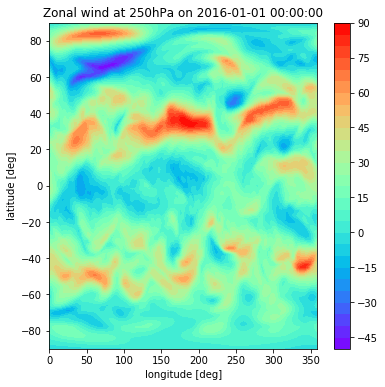

In [10]:
plt.figure(figsize=(6,6))
plt.contourf(xlon,ylat,zonalwind[p_idx,:,:],30,cmap='rainbow') # number of contours = 30, color scheme = 'rainbow'
plt.title('Zonal wind at 250hPa on '+str(tarray[tstep]))
plt.xlabel('longitude [deg]')
plt.ylabel('latitude [deg]')
plt.colorbar()
plt.show()

# Compute and plot zonal mean wind (averaging over all longitudes)

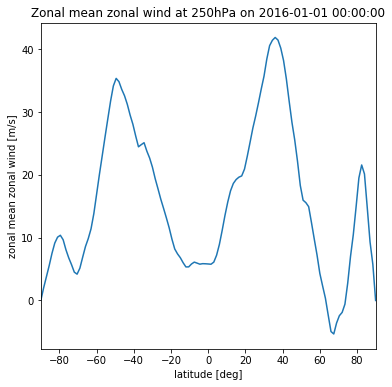

In [11]:
zonalmean_zonalwind = zonalwind[p_idx,:,:].mean(axis=-1)
plt.figure(figsize=(6,6))
plt.plot(ylat,zonalmean_zonalwind)
plt.title('Zonal mean zonal wind at 250hPa on '+str(tarray[tstep]))
plt.xlabel('latitude [deg]')
plt.ylabel('zonal mean zonal wind [m/s]')
plt.xlim((-90,90))
plt.show()

# Plot zonal wind cross section

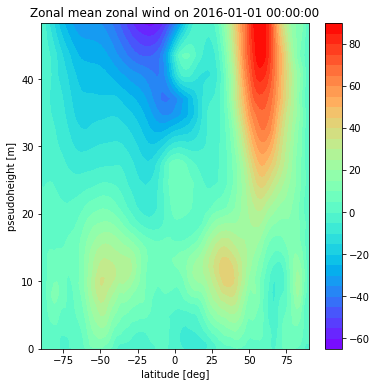

In [12]:
plt.figure(figsize=(6,6))
plt.contourf(ylat,-7.*np.log(plev/1000.),zonalwind[:,:,:].mean(axis=-1),30,cmap='rainbow') # number of contours = 30, color scheme = 'rainbow'
plt.title('Zonal mean zonal wind on '+str(tarray[tstep]))
plt.ylabel('pseudoheight [m]')
plt.xlabel('latitude [deg]')
plt.colorbar()
plt.show()

# Close the loaded file

In [ ]:
fileobj.close()